# add notation

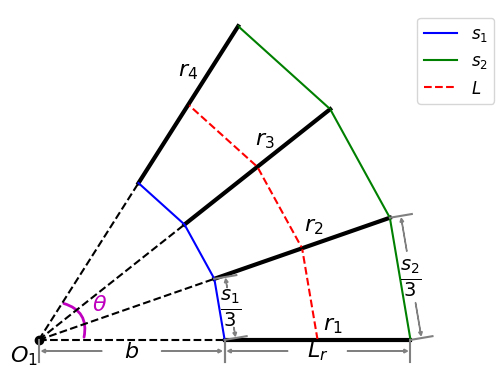

Inner Points: [(2.5, 0.0), (2.361111111111111, 0.8216777476527247), (1.9598765432098764, 1.55205796778848), (1.3408779149519887, 2.1099873026144036)]
Outer Points: [(5.0, 0.0), (4.722222222222222, 1.6433554953054494), (3.9197530864197527, 3.10411593557696), (2.6817558299039774, 4.219974605228807)]
Midpoints (M): [(3.75, 0.0), (3.541666666666667, 1.232516621479087), (2.9398148148148144, 2.32808695168272), (2.011316872427983, 3.1649809539216056)]


In [111]:

from matplotlib.patches import ConnectionPatch
from matplotlib.patches import FancyArrow
from matplotlib.patches import FancyArrowPatch, PathPatch
from matplotlib.path import Path

import matplotlib.pyplot as plt
import numpy as np


def plot_helper(ax, point1, point2, curvature=0.5):
    """
    Helper function to draw a curved arrow from point1 to point2.
    
    Parameters:
    ax        : Matplotlib axis object.
    point1    : Tuple (x1, y1), the starting point of the arrow.
    point2    : Tuple (x2, y2), the ending point of the arrow.
    curvature : Float, controls the curvature of the arrow. Default is 0.5.
    """
    # 绘制箭头 (从 point1 到 point2，使用 FancyArrowPatch)
    arrow = FancyArrowPatch(point1, point2, connectionstyle=f"arc3,rad={curvature}", 
                            arrowstyle='-', mutation_scale=15, color='m', linewidth=2)
    ax.add_patch(arrow)


def plot_dimension(ax, point1, point2, label="R", offset=0.5, offset2=0.1, gap_ratio=0.2,arrow_length=0.87, fontsize=16):
    """
    Plot a dimension line between point1 and point2 with perpendicular lines,
    two dotted lines on both sides of the label, and an empty space in the middle for the label.

    Parameters:
    ax        : Matplotlib axis object.
    point1    : Tuple (x1, y1), the first point.
    point2    : Tuple (x2, y2), the second point.
    label     : String, the label for the distance.
    offset    : Float, how far away the perpendicular and dimension lines should be.
    gap_ratio : Float, ratio of the total line to leave as a gap for the label.
    """
    x1, y1 = point1
    x2, y2 = point2

    # Calculate the angle of the line connecting p1 and p2
    angle = np.arctan2(y2 - y1, x2 - x1)
    
    # Offset direction (perpendicular to the p1p2 line)
    dx = offset * np.sin(angle)
    dy = offset * np.cos(angle)

    dxx = (offset+offset2) * np.sin(angle)
    dyy = (offset+offset2) * np.cos(angle)
    

    # Plot perpendicular lines from point1 and point2
    ax.plot([x1, x1 - dxx], [y1, y1 + dyy], 'grey')  # Perpendicular from p1
    ax.plot([x2, x2 - dxx], [y2, y2 + dyy], 'grey')  # Perpendicular from p2

    # Calculate the midpoint between p1 and p2
    xm, ym = (x1 + x2) / 2, (y1 + y2) / 2  # Midpoint

    # Determine how much space to leave empty in the middle (gap for the label)
    total_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    gap_length = total_length * gap_ratio / 2

    # Calculate positions for the ends of the dotted lines
    x_gap_start = xm - gap_length * np.cos(angle)
    y_gap_start = ym - gap_length * np.sin(angle)
    x_gap_end = xm + gap_length * np.cos(angle)
    y_gap_end = ym + gap_length * np.sin(angle)

    # Plot two dotted lines with a gap in the middle
    # ax.plot([x1 - dx, x_gap_start - dx], [y1 + dy, y_gap_start + dy], 'k--')  # Left dotted line
    # ax.plot([x_gap_end - dx, x2 - dx], [y_gap_end + dy, y2 + dy], 'k--')      # Right dotted line

    # Label the distance in the middle of the gap
    ax.text(xm - dx, ym + dy, label, fontsize=fontsize, ha='center', va='center')
    

    ax.add_patch(FancyArrow(x_gap_start - dx, y_gap_start + dy, -np.cos(angle)*arrow_length, -np.sin(angle)*arrow_length, 
                            width=0.005, head_width=0.05, head_length=0.05, fc='grey', ec='grey'))
    
    ax.add_patch(FancyArrow(x_gap_end - dx, y_gap_end + dy, np.cos(angle)*arrow_length, np.sin(angle)*arrow_length, 
                        width=0.005, head_width=0.05, head_length=0.05, fc='grey', ec='grey'))


def draw_modular_robot_kinematics_no_ray_labels(s1, s2, lr):
    """
    Draws the modular robot kinematics visualization with arcs, segments, and angles.
    Args:
        s1: Length of string 1.
        s2: Length of string 2.
        lr: Length of rigid component.
    """
    # Calculate the derived parameters
    b = (s1 * lr) / (s2 - s1) if s1 != s2 else 0
    theta = 3 * np.arccos(1 - ((s2 - s1) ** 2) / (18 * lr**2)) if s1 <= s2 else -3 * np.arccos(1 - ((s2 - s1) ** 2) / (18 * lr**2))
    L = (s1 + s2) / 2
    
    # Define the center point
    center = (0, 0)
    
    # Define the arcs and divisions
    radius_inner = lr / 2
    radius_outer = lr
    num_divisions = 3
    angles = np.linspace(0, theta, num_divisions + 1)

    # Store points for inner and outer intersections
    inner_points = []
    outer_points = []
    midpoints = []  # To store the midpoints between inner and outer points
    
    # Start plotting
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')

    # # Draw the center point
    # ax.plot(center[0], center[1], 'o', label="$O_{1}$", )

    # Draw the center point
    ax.plot(center[0], center[1], 'o', color='black')  # Plot the center point
    ax.text(center[0]-0.2, center[1] - 0.3, "$O_{1}$", fontsize=16, color='black', ha='center')  # Add text near the point

    # Draw the inner arc
    inner_arc_x = radius_inner * np.cos(angles)
    inner_arc_y = radius_inner * np.sin(angles)
    ax.plot(inner_arc_x, inner_arc_y, 'b-', label="$s_1$")
    
    # Draw the outer arc
    outer_arc_x = radius_outer * np.cos(angles)
    outer_arc_y = radius_outer * np.sin(angles)
    ax.plot(outer_arc_x, outer_arc_y, 'g-', label="$s_2$")
    
    # Draw the rays from the center and mark intersection points
    for i, angle in enumerate(angles):
        # Calculate inner and outer intersection points
        inner_point = (radius_inner * np.cos(angle), radius_inner * np.sin(angle))
        outer_point = (radius_outer * np.cos(angle), radius_outer * np.sin(angle))
        inner_points.append(inner_point)
        outer_points.append(outer_point)
        
        # Calculate the midpoint between inner and outer points
        midpoint = ((inner_point[0] + outer_point[0]) / 2, (inner_point[1] + outer_point[1]) / 2)
        midpoints.append(midpoint)
        
        # Draw the connecting line between inner and outer points
        # ax.plot([inner_point[0], outer_point[0]], [inner_point[1], outer_point[1]], 'b-', label=f"r_{i+1}" if i == 0 else None, zorder = 1)


        ax.plot([inner_point[0], outer_point[0]], [inner_point[1], outer_point[1]], 
                color='black', linestyle='-', linewidth=3, zorder=1)  # Black line without a label
        
        # Calculate the midpoint of the line
        line_midpoint = ((inner_point[0] + outer_point[0]) / 2, (inner_point[1] + outer_point[1]) / 2)
        
        # Offset for text placement
        aa = [0.2, 0.15, 0.1, 0.]
        bb = [0.2, 0.3, 0.36, 0.45]
        text_offset_x = aa[i]  # Adjust horizontal offset
        text_offset_y = bb[i]  # Adjust vertical offset

        
        # Add text near the midpoint
        ax.text(line_midpoint[0] + text_offset_x, line_midpoint[1] + text_offset_y, 
                f"$r_{i+1}$", fontsize=16, color='black', ha='center', va='center')


    # Connect midpoints with a line to represent L
    mid_x, mid_y = zip(*midpoints)
    ax.plot(mid_x, mid_y, 'r--', label="$L$")
    
    # Add the rays connecting the center to outer points
    for i, (outer_point, angle) in enumerate(zip(outer_points, angles)):
        ax.plot([center[0], outer_point[0]], [center[1], outer_point[1]], 'k--')
    
    # Configure plot
    plot_dimension(ax, inner_points[0], outer_points[0], label="$L_r$", offset=-0.15,offset2=-0.15, arrow_length = 0.76, gap_ratio=0.32)
    plot_dimension(ax, [0, 0], inner_points[0], label="$b$", offset=-0.15,offset2=-0.15, arrow_length = 0.76, gap_ratio=0.32)
    plot_dimension(ax, inner_points[0], inner_points[1], label="$\\frac{s_1}{3}$", offset=-0.15,offset2=-0.15, arrow_length = 0.07, gap_ratio=0.65,fontsize=20)
    plot_dimension(ax, outer_points[0], outer_points[1], label="$\\frac{s_2}{3}$", offset=-0.15,offset2=-0.15, arrow_length = 0.4, gap_ratio=0.42,fontsize=20)
    # plot_dimension(ax, outer_points[0], outer_points[1], label="$s_2/3$", offset=-0.25,offset2=-0.25, arrow_length = 0.4, gap_ratio=0.42)



    plot_helper(ax, [0.6,0], [0.3,0.5])
    ax.text(0.72, 0.4, "$\\theta$", color='m', fontsize=16)

    ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', fontsize=12)

    ax.grid(True)

    ax.set_aspect('equal', 'box')

    # 去掉坐标轴
    plt.axis('off')
    
    # 不显示网格
    plt.grid(False)
    
    # 自动调整坐标轴范围
    ax.autoscale()
    
    # 显示图形
    # plt.show()
    plt.savefig("geometry")
    
    plt.show()

    # Return the stored points
    return inner_points, outer_points, midpoints

# Parameters
s1 = 15  # Example string length 1
s2 = 20  # Example string length 2
lr = 5   # Length of rigid component

# Draw and get points
inner_points, outer_points, midpoints = draw_modular_robot_kinematics_no_ray_labels(s1, s2, lr)

# Print points
print("Inner Points:", inner_points)
print("Outer Points:", outer_points)
print("Midpoints (M):", midpoints)


#  curve

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_points(s1, s2, lr, point_A, point_B):
    # Calculating theta and L
    theta = 3*np.arccos(1 - (s2 - s1)**2 / (18 * lr**2))
    print("The theta value is: ", theta * 180 / np.pi)
    print("The 1/3 theta value is: ", 1/3.0*theta * 180 / np.pi)
    L = (s1 + s2) / 2
    print("the L value is: ", L)

    # Calculating angles beta and alpha
    beta = (np.pi - theta / 3) / 2 
    if s1 < s2:
        beta = np.pi - beta
    alpha = np.arctan2(point_B[1] - point_A[1], point_B[0] - point_A[0])

    # Calculating coordinates for point C
    BC = (1 / 3) * s2
    xc = point_B[0] + BC * np.cos(alpha + beta)
    yc = point_B[1] + BC * np.sin(alpha + beta)
    point_C = (xc, yc)

    # Calculating coordinates for point D
    AD = (1 / 3) * s1
    xd = point_A[0] + AD * np.cos(alpha + beta)
    yd = point_A[1] + AD * np.sin(alpha + beta)
    point_D = (xd, yd)

    return point_A, point_B, point_C, point_D

def plot_points(point_A, point_B, point_C, point_D):
    # Plotting points A, B, C, and D and connecting them sequentially
    plt.plot(*point_A, 'bo')
    plt.plot(*point_B, 'ro')
    plt.plot(*point_C, 'go')
    plt.plot(*point_D, 'mo')

    # Plotting lines between points A, B, C, and D
    plt.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'b-')
    plt.plot([point_B[0], point_C[0]], [point_B[1], point_C[1]], 'g-')
    plt.plot([point_C[0], point_D[0]], [point_C[1], point_D[1]], 'b-')
    plt.plot([point_D[0], point_A[0]], [point_D[1], point_A[1]], 'm-')

def draw_extended_lines(point_B, point_A, point_D, point_C, s1, s2):
    plt.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'k-')
    plt.plot([point_C[0], point_D[0]], [point_C[1], point_D[1]], 'k-')
    temp = 1 if s1 < s2 else -1
    # Extend the line for initial BA
    vector_BA = np.array([point_A[0] - point_B[0], point_A[1] - point_B[1]])
    extended_BA = point_A + temp * 3 * vector_BA  # Extending line BA

    plt.plot([point_B[0], extended_BA[0]], [point_B[1], extended_BA[1]], 'b--')

    # Extend the line for final CD
    vector_CD = np.array([point_D[0] - point_C[0], point_D[1] - point_C[1]])
    extended_CD = point_D + temp * 3 * vector_CD  # Extending line CD

    plt.plot([point_C[0], extended_CD[0]], [point_C[1], extended_CD[1]], 'r--')

    # Recalculate the angle between initial BA and final CD
    unit_vector_BA = vector_BA / np.linalg.norm(vector_BA)
    unit_vector_CD = vector_CD / np.linalg.norm(vector_CD)
    dot_product = np.dot(unit_vector_BA, unit_vector_CD)
    theta_recalculated = np.arccos(dot_product) * 180 / np.pi  # Angle in degrees

    print(f"The recalculated theta between the initial BA and final CD is: {theta_recalculated:.10f} degrees")

def draw_robot(s1, s2, point_A, point_B, lr):

    # Calculating and plotting the first set of points
    point_A, point_B, point_C, point_D = calculate_points(s1, s2, lr, point_A, point_B)
    plot_points(point_A, point_B, point_C, point_D)
    initial_A = point_A
    initial_B = point_B
    # draw_extended_lines(initial_B, initial_A, point_D, point_C)

    point_A, point_B, point_C, point_D = calculate_points(s1, s2, lr, point_D, point_C)
    plot_points(point_A, point_B, point_C, point_D)

    point_A, point_B, point_C, point_D = calculate_points(s1, s2, lr, point_D, point_C)
    plot_points(point_A, point_B, point_C, point_D)
      
    final_C = point_C
    final_D = point_D
    # Drawing extended lines for the initial BA and final CD
    draw_extended_lines(initial_B, initial_A, final_D, final_C, s1, s2)
    return point_D, point_C

import math

def calculate_s1_s2(lr, L, theta):
    theta = np.radians(theta)
    # Calculate delta_s based on the given formula
    delta_s = math.sqrt(18 * lr ** 2 * (1 - math.cos(theta / 3)))
    print("delta_s", delta_s)
    print("l is: ", L)

    if theta >= 0:
        s1 = L - 0.5 * delta_s
        s2 = L + 0.5 * delta_s
    else:
        s1 = L + 0.5 * delta_s
        s2 = L - 0.5 * delta_s

    return s1, s2
    

The theta value is:  57.56440936116279
The 1/3 theta value is:  19.188136453720926
the L value is:  7.5
The theta value is:  57.56440936116279
The 1/3 theta value is:  19.188136453720926
the L value is:  7.5
The theta value is:  57.56440936116279
The 1/3 theta value is:  19.188136453720926
the L value is:  7.5
The recalculated theta between the initial BA and final CD is: 57.5644093612 degrees


/var/folders/ck/n_msw9j171v0q2rrdzg0py800000gn/T/ipykernel_66507/2531678151.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


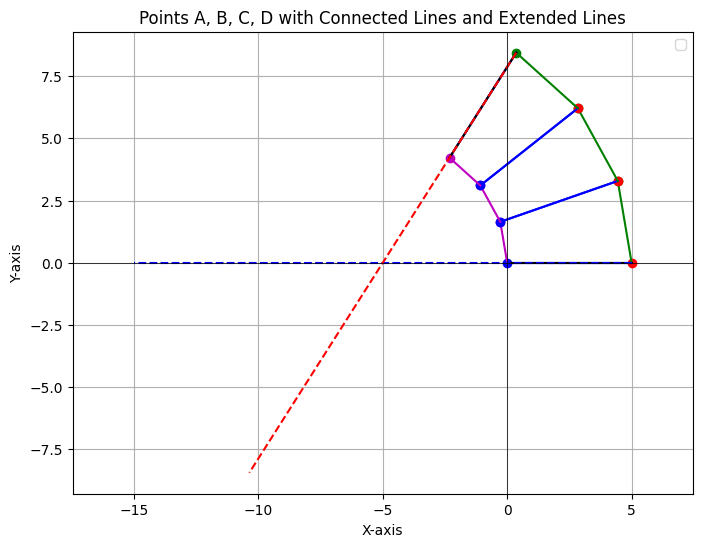

In [7]:
def main():
    # Defining variables
    lr = 5
    
    
    plt.figure(figsize=(8, 6))

    s1 = 5
    s2 = 10
    point_A = (0, 0)
    point_B = (point_A[0]+lr, 0)

    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
   

    
  


    # Setting plot details
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Points A, B, C, D with Connected Lines and Extended Lines')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    # Displaying the plot
    plt.show()

if __name__ == "__main__":
    main()

The theta value is:  11.46127903025962
The 1/3 theta value is:  3.8204263434198733
the L value is:  9.5
The theta value is:  11.46127903025962
The 1/3 theta value is:  3.8204263434198733
the L value is:  9.5
The theta value is:  11.46127903025962
The 1/3 theta value is:  3.8204263434198733
the L value is:  9.5
The recalculated theta between the initial BA and final CD is: 11.4612790303 degrees
The theta value is:  45.97353396459639
The 1/3 theta value is:  15.324511321532126
the L value is:  7.0
The theta value is:  45.97353396459639
The 1/3 theta value is:  15.324511321532126
the L value is:  7.0
The theta value is:  45.97353396459639
The 1/3 theta value is:  15.324511321532126
the L value is:  7.0
The recalculated theta between the initial BA and final CD is: 45.9735339646 degrees
The theta value is:  57.56440936116279
The 1/3 theta value is:  19.188136453720926
the L value is:  7.5
The theta value is:  57.56440936116279
The 1/3 theta value is:  19.188136453720926
the L value is:  7.

/var/folders/ck/n_msw9j171v0q2rrdzg0py800000gn/T/ipykernel_28428/616571618.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


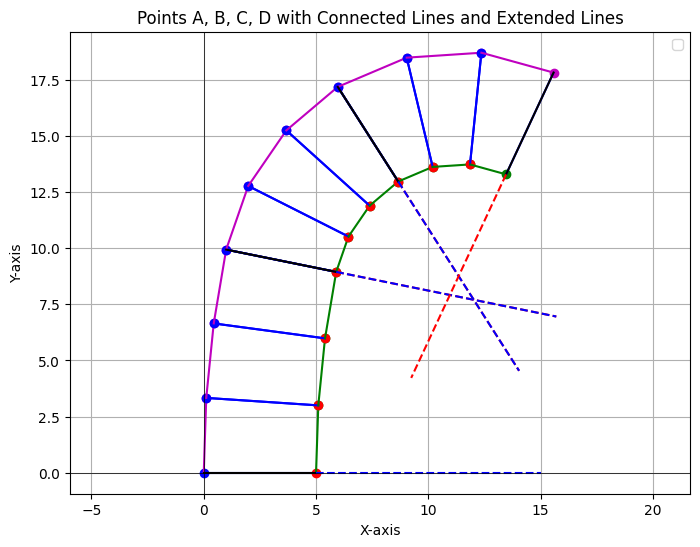

In [3]:
def main():
    # Defining variables
    lr = 5
    
    
    plt.figure(figsize=(8, 6))

    s1 = 10
    s2 = 9
    point_A = (0, 0)
    point_B = (point_A[0]+lr, 0)

    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    s1 = 9
    s2 = 5
    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    s1 = 10
    s2 = 5
    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)

    
  


    # Setting plot details
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Points A, B, C, D with Connected Lines and Extended Lines')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    # Displaying the plot
    plt.show()

if __name__ == "__main__":
    main()

The theta value is:  0.0
The 1/3 theta value is:  0.0
the L value is:  10.0
The theta value is:  0.0
The 1/3 theta value is:  0.0
the L value is:  10.0
The theta value is:  0.0
The 1/3 theta value is:  0.0
the L value is:  10.0
The recalculated theta between the initial BA and final CD is: 0.0000000000 degrees
The theta value is:  0.0
The 1/3 theta value is:  0.0
the L value is:  10.0
The theta value is:  0.0
The 1/3 theta value is:  0.0
the L value is:  10.0
The theta value is:  0.0
The 1/3 theta value is:  0.0
the L value is:  10.0
The recalculated theta between the initial BA and final CD is: 0.0000000000 degrees
The theta value is:  45.97353396459639
The 1/3 theta value is:  15.324511321532126
the L value is:  8.0
The theta value is:  45.97353396459639
The 1/3 theta value is:  15.324511321532126
the L value is:  8.0
The theta value is:  45.97353396459639
The 1/3 theta value is:  15.324511321532126
the L value is:  8.0
The recalculated theta between the initial BA and final CD is: 4

/var/folders/ck/n_msw9j171v0q2rrdzg0py800000gn/T/ipykernel_28428/419760674.py:65: RuntimeWarning: invalid value encountered in arccos
  theta_recalculated = np.arccos(dot_product) * 180 / np.pi  # Angle in degrees
/var/folders/ck/n_msw9j171v0q2rrdzg0py800000gn/T/ipykernel_28428/577491041.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


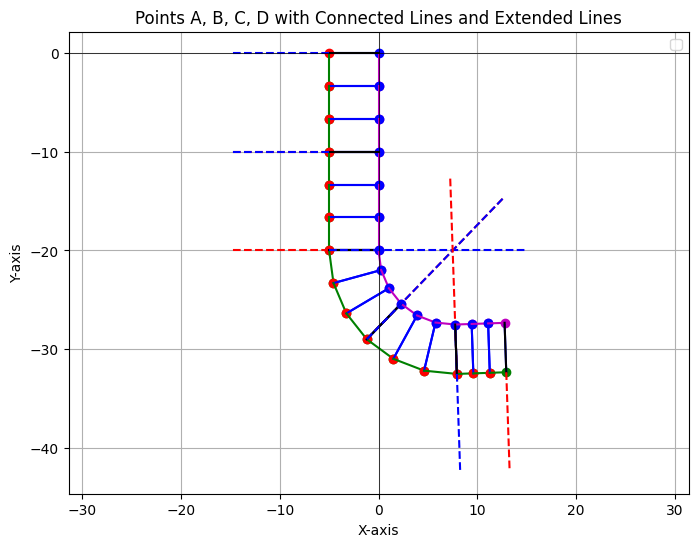

In [4]:
def main():
    # Defining variables
    lr = 5
    
    
    plt.figure(figsize=(8, 6))

    s1 = 10
    s2 = 10
    point_A = (0, 0)
    point_B = (-(point_A[0]+lr), 0)

    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    s1 = 10
    s2 = 10
    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    s1 = 6
    s2 = 10
    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    s1 = 6
    s2 = 10
    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    s1 = 5
    s2 = 5
    point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)


    # Setting plot details
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Points A, B, C, D with Connected Lines and Extended Lines')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    # Displaying the plot
    plt.show()

if __name__ == "__main__":
    main()

delta_s 2.6146722824297486
l is:  10
the calculated s1 and s2 are:  11.307336141214874 8.692663858785126
The theta value is:  30.000000000000036
The 1/3 theta value is:  10.00000000000001
the L value is:  10.0
The theta value is:  30.000000000000036
The 1/3 theta value is:  10.00000000000001
the L value is:  10.0
The theta value is:  30.000000000000036
The 1/3 theta value is:  10.00000000000001
the L value is:  10.0
The recalculated theta between the initial BA and final CD is: 30.0000000000 degrees
delta_s 1.3085816209600778
l is:  9
the calculated s1 and s2 are:  8.345709189519962 9.654290810480038
The theta value is:  14.999999999999977
The 1/3 theta value is:  4.999999999999992
the L value is:  9.0
The theta value is:  14.999999999999977
The 1/3 theta value is:  4.999999999999992
the L value is:  9.0
The theta value is:  14.999999999999977
The 1/3 theta value is:  4.999999999999992
the L value is:  9.0
The recalculated theta between the initial BA and final CD is: 15.0000000000 deg

/var/folders/ck/n_msw9j171v0q2rrdzg0py800000gn/T/ipykernel_28428/1327007445.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


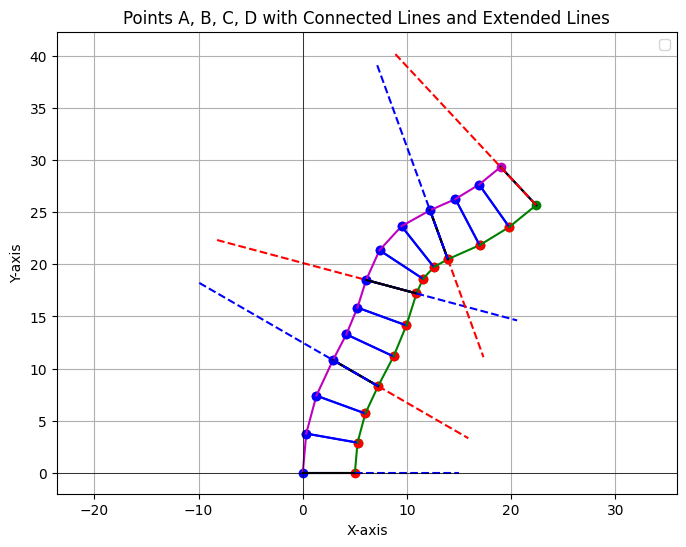

In [5]:
def main():
    # Defining variables
    lr = 5
    
    
    plt.figure(figsize=(8, 6))


    point_A = (0, 0)
    point_B = (point_A[0]+lr, 0)

    # input L and theta
    L_values = [10, 9, 7,9]
    theta_values = [-30, 15, -55, 23]
    
    for L, theta in zip(L_values, theta_values):
        s1, s2 = calculate_s1_s2(lr, L, theta)
        print("the calculated s1 and s2 are: ", s1, s2)
        point_A, point_B = draw_robot(s1, s2, point_A, point_B, lr)
    

    # Setting plot details
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Points A, B, C, D with Connected Lines and Extended Lines')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    # Displaying the plot
    plt.show()

if __name__ == "__main__":
    main()

In [2]:
# Enable the interactive backend for Jupyter Notebook
%matplotlib widget

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt



# Load the image
image = cv2.imread('/Users/luyangz/Desktop/l-shape.png')


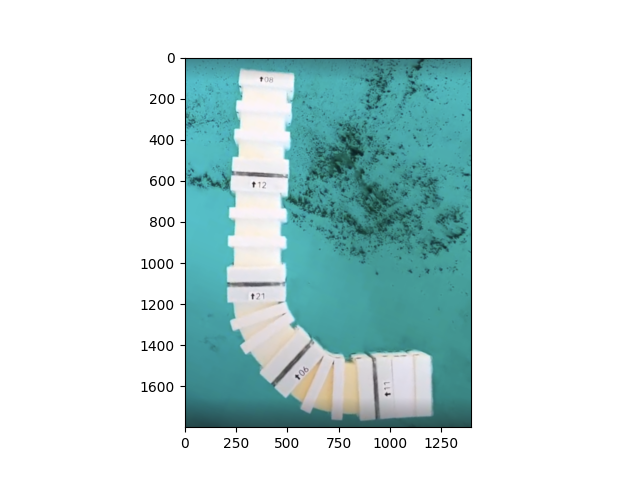

In [7]:


# Convert image to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Store clicked points and lines
points = []
lines = []
max_lines = 2  # 设置检测线条数量的阈值
interactive_mode = True  # 控制交互模式开关

# Function to calculate the angle between two lines
def calculate_angle(p1, p2, p3, p4):
    vec1 = (p2[0] - p1[0], p2[1] - p1[1])
    vec2 = (p4[0] - p3[0], p4[1] - p3[1])
    # Calculate the angle
    angle = math.degrees(math.acos(
        (vec1[0] * vec2[0] + vec1[1] * vec2[1]) /
        (math.sqrt(vec1[0] ** 2 + vec1[1] ** 2) * math.sqrt(vec2[0] ** 2 + vec2[1] ** 2))
    ))
    return angle

# Click event handler
def onclick(event):
    global points, lines, interactive_mode

    # 检查交互模式是否已经结束
    if not interactive_mode:
        return  # 如果已结束，不再处理点击事件

    # Get click position
    x, y = int(event.xdata), int(event.ydata)
    points.append((x, y))
    plt.plot(x, y, 'ro')  # Draw point
    plt.draw()

    # Draw line for every two points
    if len(points) % 2 == 0:
        p1, p2 = points[-2], points[-1]
        lines.append((p1, p2))

        # Draw line
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-')
        plt.draw()

        # Calculate angle if we have two lines
        if len(lines) == max_lines:
            angle = calculate_angle(*lines[0][0], *lines[0][1], *lines[1][0], *lines[1][1])
            print(f"Angle between the two lines: {angle:.2f} degrees")

# Key press event handler
def onkey(event):
    global interactive_mode
    if event.key.lower() == 'q':
        interactive_mode = False
        fig.canvas.mpl_disconnect(cid_click)  # 解除点击事件
        fig.canvas.mpl_disconnect(cid_key)    # 解除按键事件
        print("Process finished. Interactive mode ended.")

# Display the image
fig, ax = plt.subplots()
ax.imshow(image_rgb)

# Connect click and key press events
cid_click = fig.canvas.mpl_connect('button_press_event', onclick)
cid_key = fig.canvas.mpl_connect('key_press_event', onkey)

plt.show()


In [8]:
import math

# Function to calculate the angle between two lines
def calculate_angle_between_lines(line1, line2):
    # Extract points from the lines
    p1, p2 = line1
    p3, p4 = line2
    
    # Calculate direction vectors for each line
    vec1 = (p2[0] - p1[0], p2[1] - p1[1])
    vec2 = (p4[0] - p3[0], p4[1] - p3[1])

    # Calculate the angle between vec1 and vec2
    dot_product = vec1[0] * vec2[0] + vec1[1] * vec2[1]
    magnitude_vec1 = math.sqrt(vec1[0]**2 + vec1[1]**2)
    magnitude_vec2 = math.sqrt(vec2[0]**2 + vec2[1]**2)
    
    # Avoid division by zero in case of zero-length vectors
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return None  # Undefined angle if any vector has zero length

    angle = math.degrees(math.acos(dot_product / (magnitude_vec1 * magnitude_vec2)))
    return angle

# Calculate and print angles between consecutive line pairs
for i in range(0, len(lines) - 1, 2):
    line1 = lines[i]
    line2 = lines[i + 1]
    angle = calculate_angle_between_lines(line1, line2)
    
    if angle is not None:
        print(f"Angle between line {i+1} and line {i+2}: {angle:.2f} degrees")
    else:
        print(f"Angle between line {i+1} and line {i+2} is undefined (zero-length vector).")


Angle between line 1 and line 2: 1.83 degrees
Angle between line 3 and line 4: 133.63 degrees
Angle between line 5 and line 6: 2.06 degrees


In [10]:
import math

# Function to calculate the angle between two lines
def calculate_angle_between_lines(line1, line2):
    # Extract points from the lines
    p1, p2 = line1
    p3, p4 = line2
    
    # Calculate direction vectors for each line
    vec1 = (p2[0] - p1[0], p2[1] - p1[1])
    vec2 = (p4[0] - p3[0], p4[1] - p3[1])

    # Calculate the angle between vec1 and vec2
    dot_product = vec1[0] * vec2[0] + vec1[1] * vec2[1]
    magnitude_vec1 = math.sqrt(vec1[0]**2 + vec1[1]**2)
    magnitude_vec2 = math.sqrt(vec2[0]**2 + vec2[1]**2)
    
    # Avoid division by zero in case of zero-length vectors
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return None  # Undefined angle if any vector has zero length

    angle = math.degrees(math.acos(dot_product / (magnitude_vec1 * magnitude_vec2)))
    return angle

# Calculate and print angles between every consecutive line pair
for i in range(len(lines) - 1):
    line1 = lines[i]
    line2 = lines[i + 1]
    angle = calculate_angle_between_lines(line1, line2)
    
    if angle is not None:
        print(f"Angle between line {i+1} and line {i+2}: {angle:.2f} degrees")
    else:
        print(f"Angle between line {i+1} and line {i+2} is undefined (zero-length vector).")


Angle between line 1 and line 2: 1.83 degrees
Angle between line 2 and line 3: 46.47 degrees
Angle between line 3 and line 4: 133.63 degrees
Angle between line 4 and line 5: 4.28 degrees
Angle between line 5 and line 6: 2.06 degrees
